In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\T\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [3]:
#31 Jan 2023 to 30 May 2024

training_data = pd.read_csv('DXY_training_data.csv')

In [4]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-31,102.190002,102.610001,102.010002,102.099998,102.099998,0.0
1,2023-02-01,102.099998,102.190002,101.040001,101.220001,101.220001,0.0
2,2023-02-02,100.849998,101.910004,100.820000,101.750000,101.750000,0.0
3,2023-02-03,101.830002,103.010002,101.550003,102.919998,102.919998,0.0
4,2023-02-05,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
374,2024-04-24,105.690002,105.949997,105.589996,105.860001,105.860001,0.0
375,2024-04-25,105.820000,106.000000,105.510002,105.599998,105.599998,0.0
376,2024-04-26,105.580002,106.190002,105.410004,105.940002,105.940002,0.0
377,2024-04-28,NaN,NaN,NaN,NaN,NaN,NaN
378,2024-04-29,106.080002,106.080002,105.459999,105.580002,105.580002,0.0


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       379 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.9+ KB


In [7]:
training_data = training_data.dropna(axis = 0, how ='any')  

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.6+ KB


C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

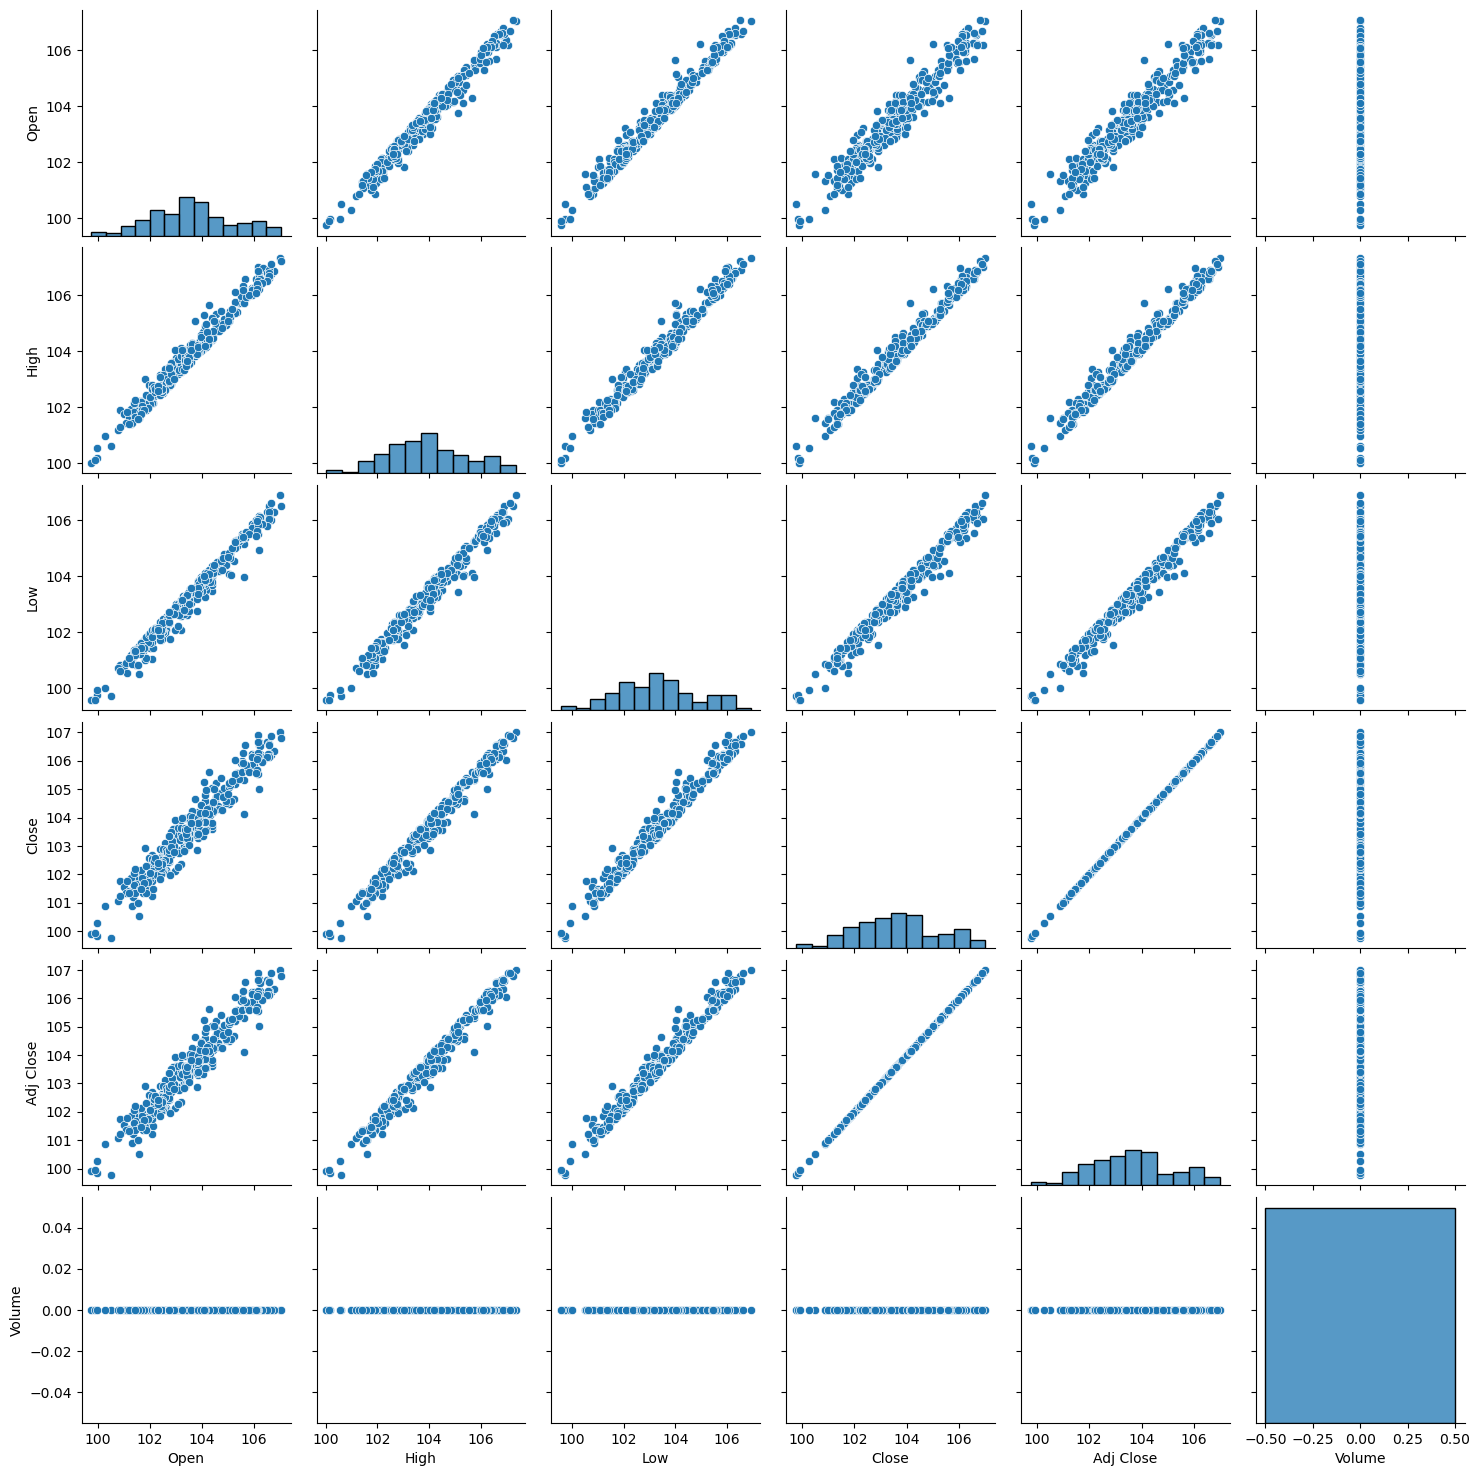

In [9]:
sns.pairplot(training_data)

In [10]:
training_data = training_data.iloc[:, 4].values  ##this will store the data in a numpy array ##NN needs to be an array

In [11]:
type(training_data) ##check the type of data

numpy.ndarray

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler() ###because the data is linearly correlated -- makes it easier for the model to manage 

In [14]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1)) ##application of scaler to the data, the scaler range is -1 to 1

In [15]:
##you don't do normal x and y train because it collects random data, the data needs to be in a sequential order

x_training_data = []##independent variable

y_training_data =[]##dependent

In [16]:
###loop through put one day into dependent variable then 40 will be added as independent variable.

for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])##40 prior to where i am and taking being stored to x
    y_training_data.append(training_data[i, 0])### y training data

In [17]:
##put both lists into a numpy array
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)

In [18]:
print(x_training_data.shape)##40 days

print(y_training_data.shape)##y is just one feature so it contains rows of data ##each of the values  ##you have to use the x train and y train to predict

(273, 40)
(273,)


In [19]:
##need to add an additional dimension because this is required for tensor flow

x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],

                                               x_training_data.shape[1],

                                               1))

In [20]:
print(x_training_data.shape)

(273, 40, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [22]:
rnn = Sequential() ##initialising/naming rnn

In [23]:
rnn.add(LSTM(units = 40, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))###no activation function because LSTM defaults to an activation function
##input neurons 40 which is one for each day.
##return sequence true is what makes it recurrent
##increase to 45 to increase the dimesionality


C:\Users\T\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
rnn.add(Dropout(0.2))##the droput layer drops some data to help with overfitting and the exploding gradient issue

In [25]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))###final layer never uses the return sequence that makes it recurrent

##activation function is default is tanh

In [26]:
rnn.add(Dense(units = 1)) ###specifies the number of required outputs -- which is the next day stock price

In [27]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.2383
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0629
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0407
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0388
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0316
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0317
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0290
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0254
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0225
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0270
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0202
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0204
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0238
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0179
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0218
Epoch 16/100
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0088
Epoch 84/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0096
Epoch 85/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0108
Epoch 86/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0113
Epoch 87/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0110
Epoch 88/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0091
Epoch 89/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0108
Epoch 90/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0100
Epoch 91/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0105
Epoch 92/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0095
Epoch 93/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0120
Epoch 94/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0101
Epoch 95/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0110
Epoch 96/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0094
Epoch 97/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0098
Epoch 98/100
9/9 ━━━━━━

In [29]:
##lets test the model

test_data = pd.read_csv('DXY_test_data.csv')###next 20 days

In [30]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-29,106.080002,106.080002,105.459999,105.580002,105.580002,0.0
1,2024-04-30,105.669998,106.349998,105.669998,106.220001,106.220001,0.0
2,2024-05-01,106.320000,106.489998,105.440002,105.760002,105.760002,0.0
3,2024-05-02,105.730003,105.900002,105.300003,105.300003,105.300003,0.0
4,2024-05-03,105.309998,105.370003,104.519997,105.029999,105.029999,0.0


In [31]:
test_data = test_data.dropna(axis = 0, how ='any') 

In [32]:
test_data = test_data.iloc[:, 4].values

In [33]:
print(test_data.shape)

(20,)


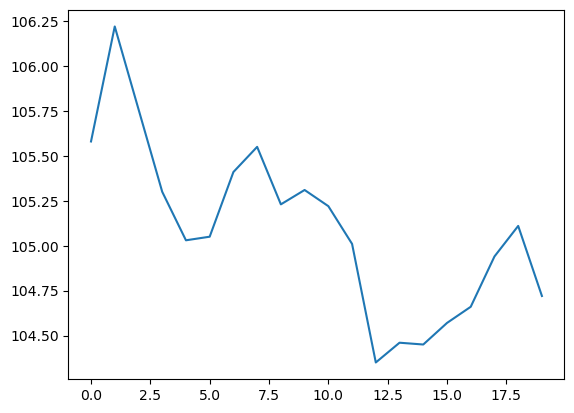

In [34]:
plt.plot(test_data)##change in data for the test data

In [35]:
unscaled_training_data = pd.read_csv('DXY_training_data.csv')

unscaled_test_data = pd.read_csv('DXY_test_data.csv')

In [36]:
unscaled_training_data = unscaled_training_data.dropna(axis = 0, how ='any') 
unscaled_test_data = unscaled_test_data.dropna(axis = 0, how ='any') 



In [37]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [38]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [39]:
len(x_test_data)

60

In [40]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [41]:
x_test_data = scaler.transform(x_test_data)

In [42]:
final_x_test_data = []

for i in range(40, len(x_test_data)):###index 40 is observation 41 because we start at 0

    final_x_test_data.append(x_test_data[i-40:i, 0])##41st variable and saving in the y variable

final_x_test_data = np.array(final_x_test_data)


In [43]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [44]:
predictions = rnn.predict(final_x_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


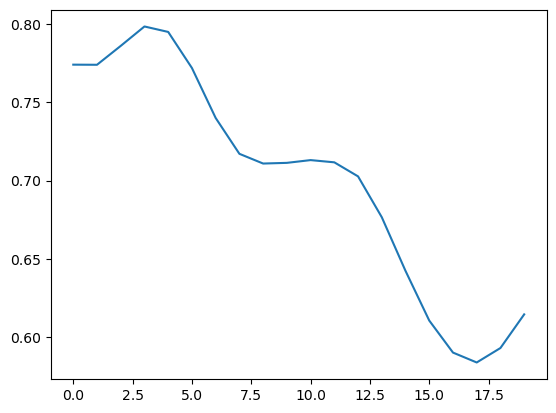

In [45]:
plt.plot(predictions)

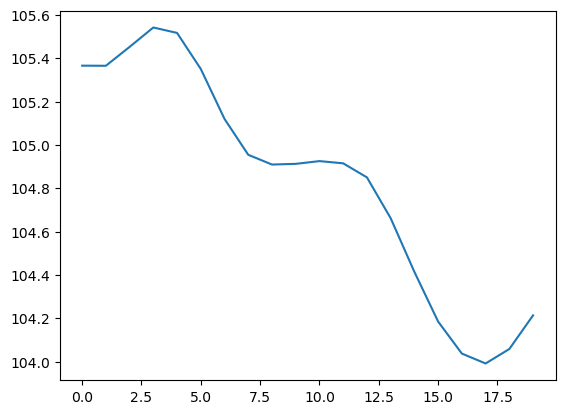

In [46]:
unscaled_predictions = scaler.inverse_transform(predictions)##you have to unscale data that you-ve scaleed using the inverse transformation

plt.plot(unscaled_predictions)


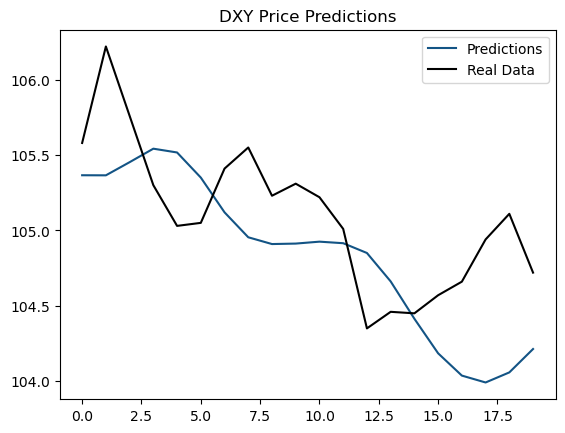

In [47]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('DXY Price Predictions')

plt.legend()






In [48]:
print("The last trading day price prediction is for April 2024 is: ",unscaled_predictions[0])
print("The real last trading day price for april 2024 is: ",test_data[0])

The last trading day price prediction is for April 2024 is:  [105.36588]
The real last trading day price for april 2024 is:  105.580002


In [49]:
print(unscaled_predictions)

[[105.36588 ]
 [105.365326]
 [105.45252 ]
 [105.54209 ]
 [105.51691 ]
 [105.35042 ]
 [105.11987 ]
 [104.954414]
 [104.90948 ]
 [104.91264 ]
 [104.925354]
 [104.915085]
 [104.85022 ]
 [104.66175 ]
 [104.414024]
 [104.184814]
 [104.037025]
 [103.99133 ]
 [104.05812 ]
 [104.213326]]


In [50]:
#pip install streamlit

In [51]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

In [52]:
app = dash.Dash(_name_)
app.layout = html.Div([
    html.H1('Dash Demo'),
    dcc.Graph(id='graph'),
    html.Label([
        id='colorscale-dropdown', clearable =False,
        value ='plasma', options =[
            
        ]
        
        
        
    ])
                      
                      ])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3778424448.py, line 6)

In [ ]:
import streamlit as st

In [ ]:
st.pyplot

st.write("The last trading day price prediction is for April 2024 is:", unscaled_predictions[0])
st.write("The real last trading day price for May 2024 is:", test_data[0])



In [55]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import numpy as np
import pandas as pd


C:\Users\T\AppData\Local\Temp\ipykernel_54112\2122749993.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\T\AppData\Local\Temp\ipykernel_54112\2122749993.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [59]:
array = np.array([
    [105.36588],
    [105.365326],
    [105.45252],
    [105.54209],
    [105.51691],
    [105.35042],
    [105.11987],
    [104.954414],
    [104.90948],
    [104.91264],
    [104.925354],
    [104.915085],
    [104.85022],
    [104.66175],
    [104.414024],
    [104.184814],
    [104.037025],
    [103.99133],
    [104.05812],
    [104.213326]
])

In [61]:
# Define the array
array = np.array([
    [105.36588],
    [105.365326],
    [105.45252],
    [105.54209],
    [105.51691],
    [105.35042],
    [105.11987],
    [104.954414],
    [104.90948],
    [104.91264],
    [104.925354],
    [104.915085],
    [104.85022],
    [104.66175],
    [104.414024],
    [104.184814],
    [104.037025],
    [103.99133],
    [104.05812],
    [104.213326]
])

# Create a DataFrame with days as index
days = np.arange(1, len(array) + 1)
df = pd.DataFrame(array, columns=["value"], index=days)
df.index.name = 'day'

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("DXY price Plot Dashboard"),
    
    dcc.Graph(
        id='scatter-plot',
        figure=px.scatter(df, x=df.index, y='value', title='DXY Data Points Over Days').update_layout(
            xaxis_title='Day', yaxis_title='DXY price')
    ),
    
    html.Div([
        html.Label("Enter Day Index:"),
        dcc.Input(id='day-input', type='number', value=1, min=1, max=len(df)),
        html.Button(id='submit-button', n_clicks=0, children='Submit')
    ]),
    
    html.Div(id='output-value', style={'marginTop': 20})
])

@app.callback(
    Output('output-value', 'children'),
    [Input('submit-button', 'n_clicks')],
    [State('day-input', 'value')]
)
def display_day_value(n_clicks, day):
    if day is None or day < 1 or day > len(df):
        return "Please enter a valid day index."
    value = df.loc[day, 'value']
    return f'The value for day {day} is {value}.'

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Change the port to 8051